In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
df = pd.read_csv('walmart_data.csv')

In [65]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


Big goal: analyze purchase behavior for male and female customers

1. plot a chart to see the diff in combined purchase for men and women 
2. see purchase behavior across men and women among diff age groups, occupation, city categories, marital status

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### Gender wise spending behavior 

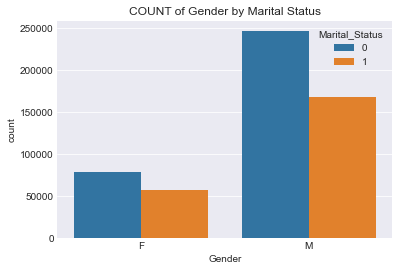

In [38]:
sns.countplot(data = df, x = 'Gender', hue='Marital_Status')
plt.title('COUNT of Gender by Marital Status')
plt.style.use('seaborn-darkgrid')
plt.show()

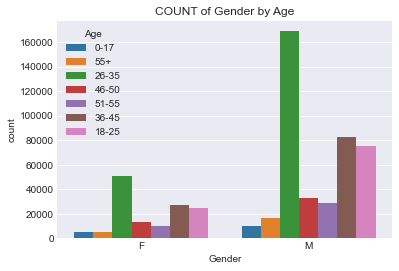

In [39]:
sns.countplot(data = df, x = 'Gender', hue='Age')
plt.title('COUNT of Gender by Age')
plt.style.use('seaborn-darkgrid')
plt.show()

The above charts provide a count of Gender distribution but that may not be enough to understand the spending behavior. 
We need to assume the Purchase is amount. So let's do aggregate analysis on SUM of Purchase amount.

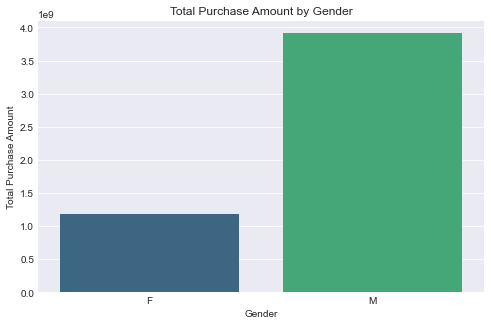

In [42]:
# Grouping by Gender and calculating the total purchase amount for each gender
gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()

# Plotting the total purchase amount by Gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_purchase, x='Gender', y='Purchase', palette='viridis')
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')

plt.show()

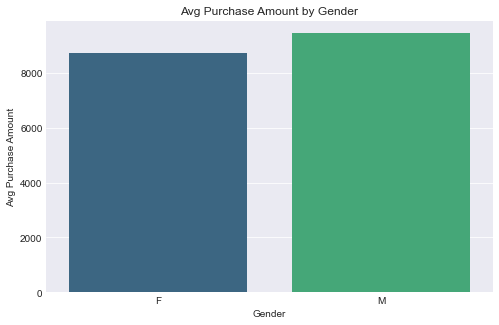

In [105]:
# Grouping by Gender and calculating the total purchase amount for each gender
gender_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()

# Plotting the total purchase amount by Gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_purchase, x='Gender', y='Purchase', palette='viridis')
plt.title('Avg Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Purchase Amount')

plt.show()

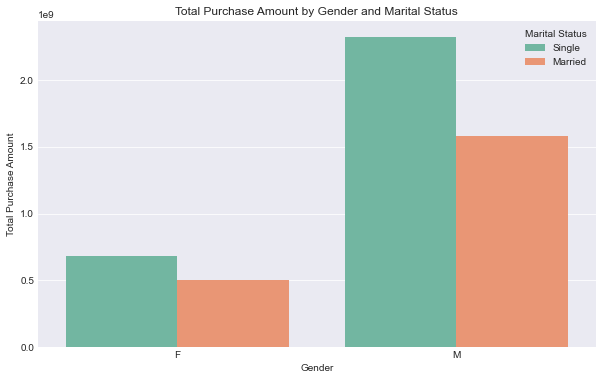

In [50]:
# Grouping by Gender and Marital Status, and calculating total purchase amount
gender_marital_purchase = df.groupby(['Gender', 'Marital_Status'])['Purchase'].sum().reset_index()

# Converting Marital_Status to readable labels
gender_marital_purchase['Marital_Status'] = gender_marital_purchase['Marital_Status'].map({0: 'Single', 1: 'Married'})

# Plotting the total purchase amount by Gender and Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_marital_purchase, 
            x='Gender', y='Purchase', 
            hue='Marital_Status', palette='Set2')

plt.title('Total Purchase Amount by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Marital Status')
plt.show()

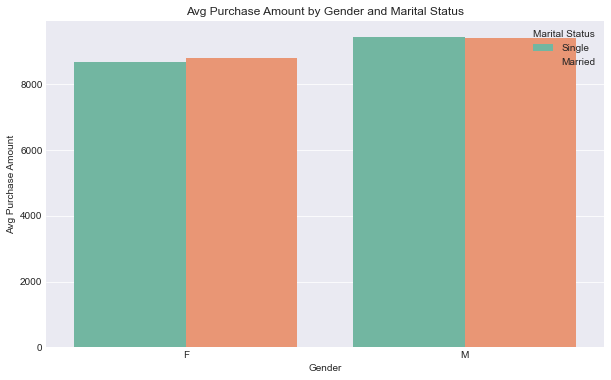

In [106]:
# Grouping by Gender and Marital Status, and calculating avg purchase amount
gender_marital_purchase = df.groupby(['Gender', 'Marital_Status'])['Purchase'].mean().reset_index()

# Converting Marital_Status to readable labels
gender_marital_purchase['Marital_Status'] = gender_marital_purchase['Marital_Status'].map({0: 'Single', 1: 'Married'})

# Plotting the total purchase amount by Gender and Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_marital_purchase, 
            x='Gender', y='Purchase', 
            hue='Marital_Status', palette='Set2')

plt.title('Avg Purchase Amount by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Avg Purchase Amount')
plt.legend(title='Marital Status')
plt.show()

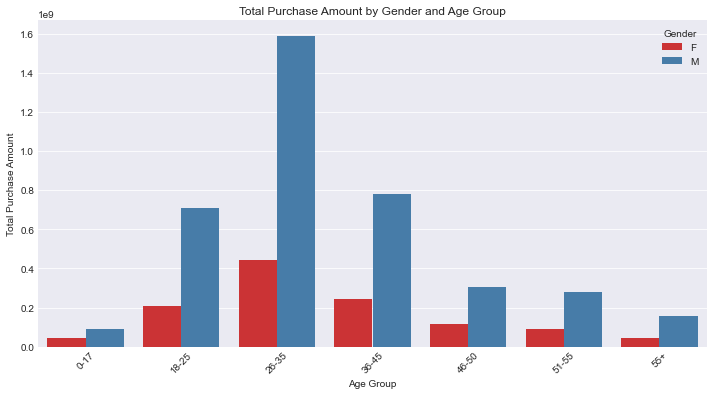

In [51]:
# Grouping by Gender and Age, and calculating the total purchase amount
gender_age_purchase = (
    df.groupby(['Gender', 'Age'])['Purchase']
    .sum()
    .reset_index()
)

# Plotting the total purchase amount by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_age_purchase, 
            x='Age', y='Purchase', 
            hue='Gender', palette='Set1')

plt.title('Total Purchase Amount by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


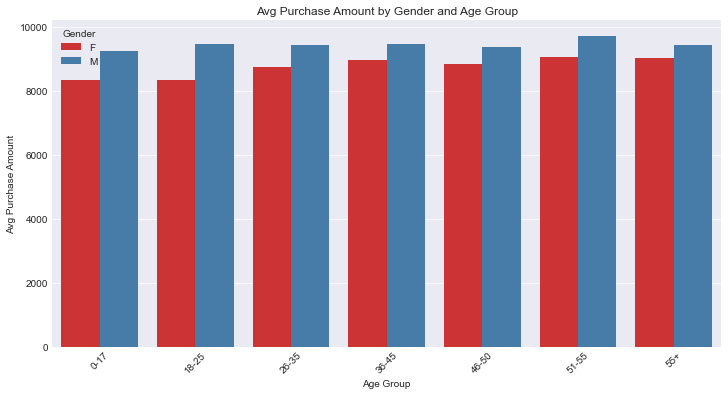

In [107]:
# Grouping by Gender and Age, and calculating the avg purchase amount
gender_age_purchase = (
    df.groupby(['Gender', 'Age'])['Purchase']
    .mean()
    .reset_index()
)

# Plotting the total purchase amount by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_age_purchase, 
            x='Age', y='Purchase', 
            hue='Gender', palette='Set1')

plt.title('Avg Purchase Amount by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Purchase Amount')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

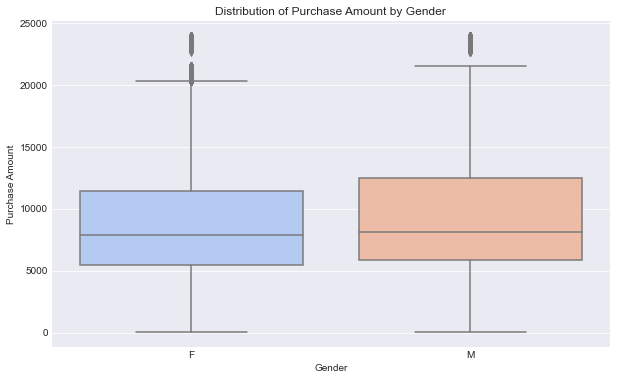

In [52]:
# Plotting the distribution of purchase amounts using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Purchase', palette='coolwarm')

plt.title('Distribution of Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


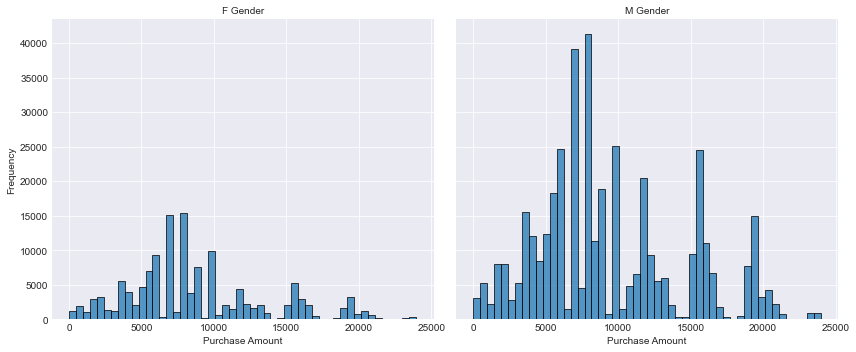

In [62]:
# Create a FacetGrid to separate histograms by gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1.2, palette='coolwarm')
g.map(sns.histplot, 'Purchase', bins=50)

# Set titles and labels
g.set_axis_labels('Purchase Amount', 'Frequency')
g.set_titles(col_template='{col_name} Gender')

# Show the plot
plt.show()

/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


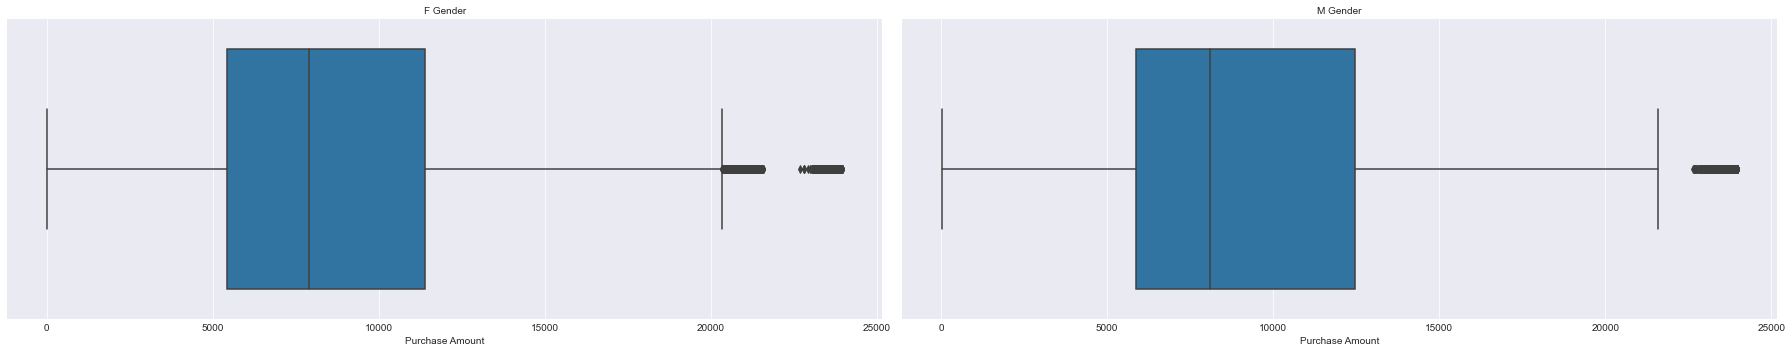

In [55]:

# Create a FacetGrid to separate plots by gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=2.5, palette='coolwarm')
g.map(sns.boxplot, 'Purchase')

# Set titles and labels
g.set_axis_labels('Purchase Amount', '')
g.set_titles(col_template='{col_name} Gender')

# Show the plot
plt.show()

In [56]:
iqr_data = df.groupby('Gender')['Purchase'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25)).reset_index(name = 'IQR')

In [59]:
# Print IQR for each gender
print("IQR for Purchase Amount by Gender:")
print(iqr_data)

# Calculate lower and upper bounds for outliers (1.5 * IQR rule)
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Identify outliers for each gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]['Purchase']
    lower, upper = find_outliers(gender_data)
    outliers = gender_data[(gender_data < lower) | (gender_data > upper)]
    print(f"\nOutliers for Gender = {gender}:")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

IQR for Purchase Amount by Gender:
  Gender     IQR
0      F  5967.0
1      M  6591.0

Outliers for Gender = F:
Lower Bound: -3517.5, Upper Bound: 20350.5
Number of Outliers: 2065

Outliers for Gender = M:
Lower Bound: -4023.5, Upper Bound: 22340.5
Number of Outliers: 1812



Outliers above the upper bound for Gender = F:
Upper Bound: 20350.5
Number of Upper Outliers: 2065
Top 5 Upper Outliers:
437804    23959
449656    23955
366147    23951
342015    23950
139056    23948
Name: Purchase, dtype: int64


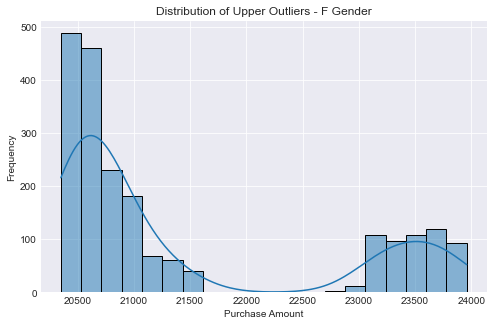


Outliers above the upper bound for Gender = M:
Upper Bound: 22340.5
Number of Upper Outliers: 1812
Top 5 Upper Outliers:
370891    23961
93016     23961
87440     23961
292083    23960
503697    23960
Name: Purchase, dtype: int64


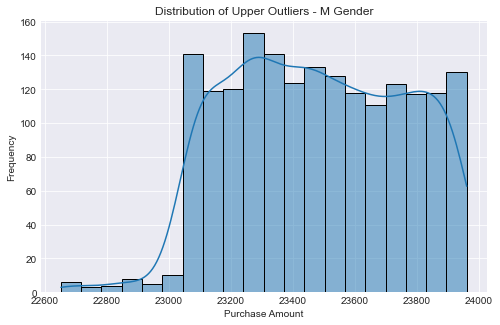

In [63]:
# Function to calculate IQR and upper bound for outliers
def calculate_upper_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR  # Calculate upper bound for outliers
    return upper_bound

# Loop through each gender and analyze the outliers above the upper bound
for gender in df['Gender'].unique():
    # Filter data for the specific gender
    gender_data = df[df['Gender'] == gender]['Purchase']
    
    # Calculate the upper bound for outliers
    upper_bound = calculate_upper_outliers(gender_data)
    
    # Extract outliers above the upper bound
    upper_outliers = gender_data[gender_data > upper_bound]
    
    print(f"\nOutliers above the upper bound for Gender = {gender}:")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Upper Outliers: {len(upper_outliers)}")
    print(f"Top 5 Upper Outliers:\n{upper_outliers.sort_values(ascending=False).head()}")

    # Optional: Plot distribution of the upper outliers
    plt.figure(figsize=(8, 5))
    sns.histplot(upper_outliers, bins=20, kde=True)
    plt.title(f'Distribution of Upper Outliers - {gender} Gender')
    plt.xlabel('Purchase Amount')
    plt.ylabel('Frequency')
    plt.show()



### Product category analysis

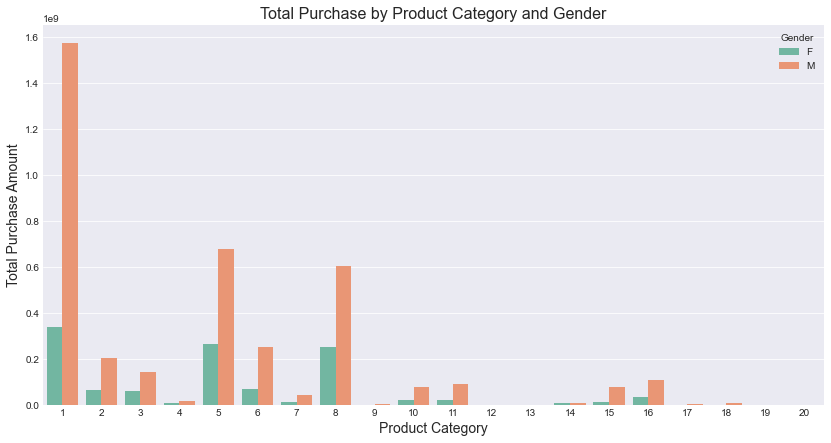

In [67]:
# Grouping by Product Category and Gender, and calculating the total purchase amount
product_gender_purchase = (
    df.groupby(['Product_Category', 'Gender'])['Purchase']
    .sum()
    .reset_index()
)

# Plotting the grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=product_gender_purchase, 
            x='Product_Category', y='Purchase', 
            hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Total Purchase by Product Category and Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()


1, 5, 8 are bought the most by both.


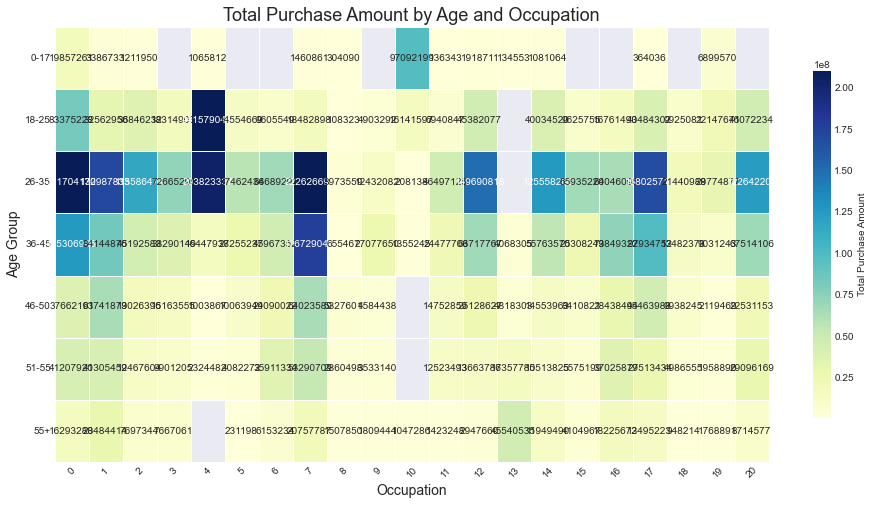

In [69]:
# Group by Age and Occupation to calculate the total purchase amount
age_occupation_purchase = (
    df.groupby(['Age', 'Occupation'])['Purchase']
    .sum()
    .reset_index()
    .pivot('Age', 'Occupation', 'Purchase')
)

# Plotting the heatmap with improved readability
plt.figure(figsize=(16, 8))  # Increase figure size for better visibility
sns.heatmap(
    age_occupation_purchase, 
    annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, 
    robust=True,  # Ignore extreme values for better scaling
    cbar_kws={'shrink': 0.8, 'label': 'Total Purchase Amount'}  # Adjust colorbar
)

# Set titles and labels
plt.title('Total Purchase Amount by Age and Occupation', fontsize=18)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.show()


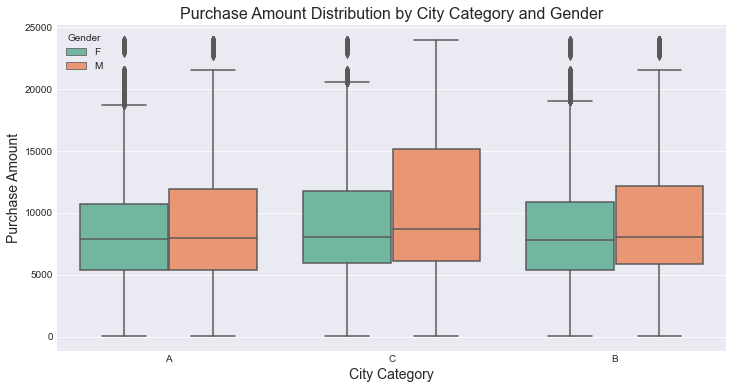

In [72]:

# Boxplot to visualize purchase distribution by city category and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Purchase Amount Distribution by City Category and Gender', fontsize=16)
plt.xlabel('City Category', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show the plot
plt.show()


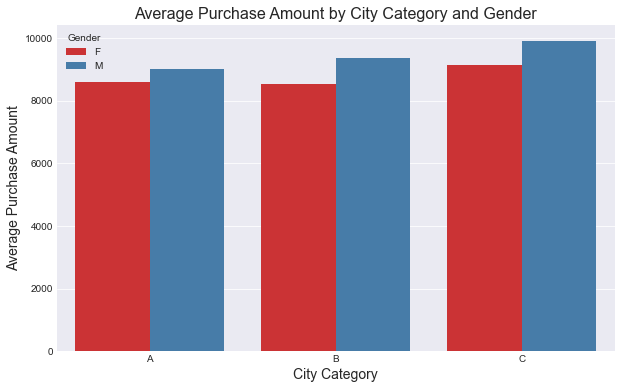

In [75]:
# Grouping by City_Category and Gender to calculate the average purchase
city_gender_avg_purchase = (
    df.groupby(['City_Category', 'Gender'])['Purchase']
    .mean()
    .reset_index()
)

# Plotting the average purchase by city category and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=city_gender_avg_purchase, x='City_Category', y='Purchase', hue='Gender', palette='Set1')

# Set plot title and labels
plt.title('Average Purchase Amount by City Category and Gender', fontsize=16)
plt.xlabel('City Category', fontsize=14)
plt.ylabel('Average Purchase Amount', fontsize=14)

# Show the plot
plt.show()


/Users/adityadhanotia/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


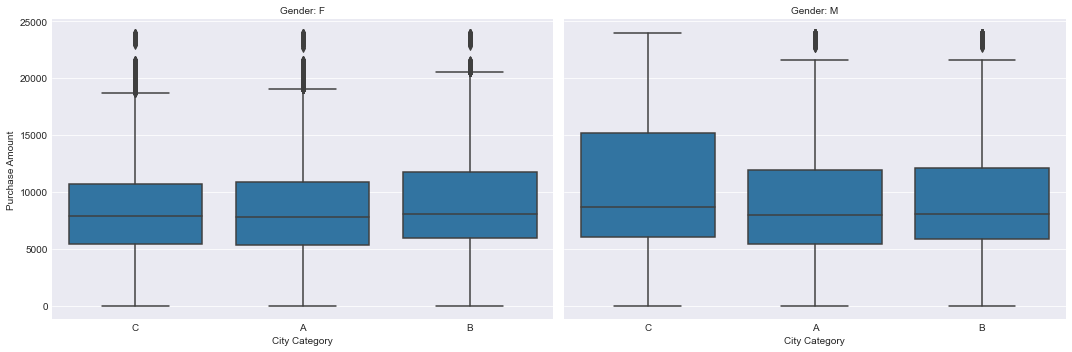

In [76]:
# Create a FacetGrid to explore the relationship between city category and purchase for each gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1.5)
g.map(sns.boxplot, 'City_Category', 'Purchase')

# Set plot titles and labels
g.set_axis_labels('City Category', 'Purchase Amount')
g.set_titles(col_template='Gender: {col_name}')

# Show the plot
plt.show()


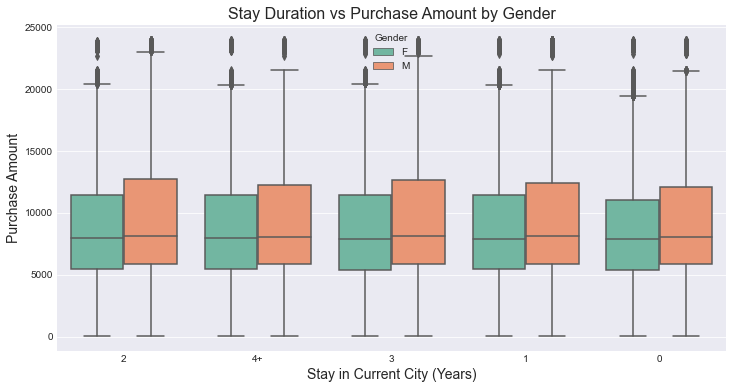

In [81]:
# Box plot to analyze stay duration vs purchase amount by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Stay Duration vs Purchase Amount by Gender', fontsize=16)
plt.xlabel('Stay in Current City (Years)', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show the plot
plt.show()


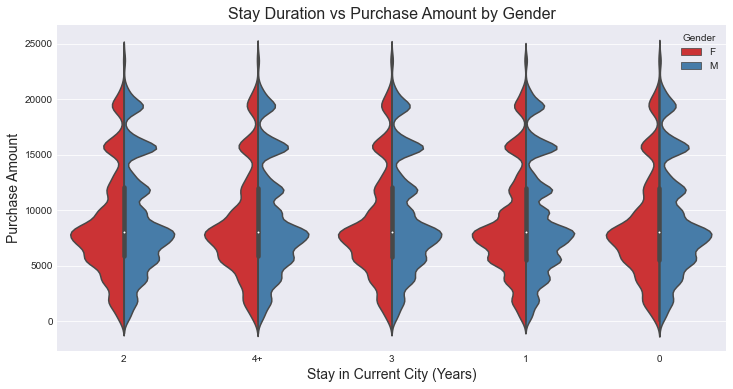

In [82]:
# Violin plot to analyze stay duration vs purchase amount by gender
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', split=True, palette='Set1')

# Set plot title and labels
plt.title('Stay Duration vs Purchase Amount by Gender', fontsize=16)
plt.xlabel('Stay in Current City (Years)', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show the plot
plt.show()


In [89]:
user_purchase = df.groupby(['User_ID', 'Gender']).agg(
    total_purchase=('Purchase', 'sum'),
    avg_purchase=('Purchase', 'mean'),
    num_transactions=('Purchase', 'count')
).reset_index()

In [91]:
user_purchase

,User_ID,Gender,total_purchase,avg_purchase,num_transactions
0,1000001,F,334093,9545.514286,35
1,1000002,M,810472,10525.610390,77
2,1000003,M,341635,11780.517241,29
3,1000004,M,206468,14747.714286,14
4,1000005,M,821001,7745.292453,106
...,...,...,...,...,...
5886,1006036,F,4116058,8007.894942,514
5887,1006037,F,1119538,9176.540984,122
5888,1006038,F,90034,7502.833333,12
5889,1006039,F,590319,7977.283784,74


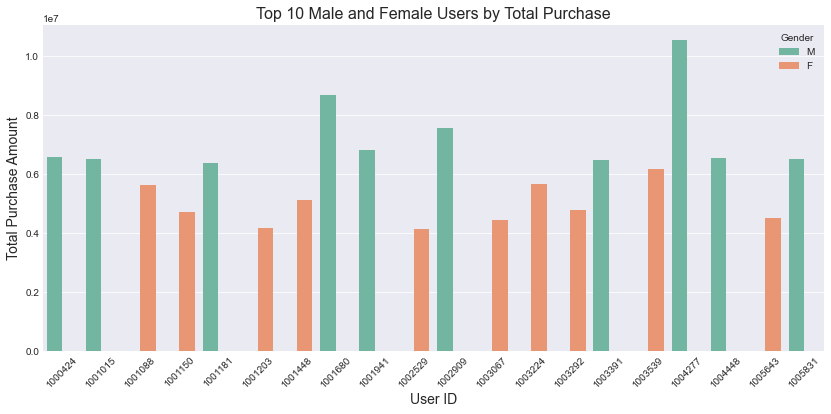

In [99]:

# Filter top 10 male and female users by total purchase
top_10_male_users_by_total_purchase = user_purchase[user_purchase['Gender'] == 'M'].nlargest(10, 'total_purchase')
top_10_female_users_by_total_purchase = user_purchase[user_purchase['Gender'] == 'F'].nlargest(10, 'total_purchase')

# Combine both top male and female users into one DataFrame
top_users = pd.concat([top_10_male_users_by_total_purchase, top_10_female_users_by_total_purchase])

# Plotting the bar plot for comparison
plt.figure(figsize=(14, 6))
sns.barplot(data=top_users, x='User_ID', y='total_purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Top 10 Male and Female Users by Total Purchase', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


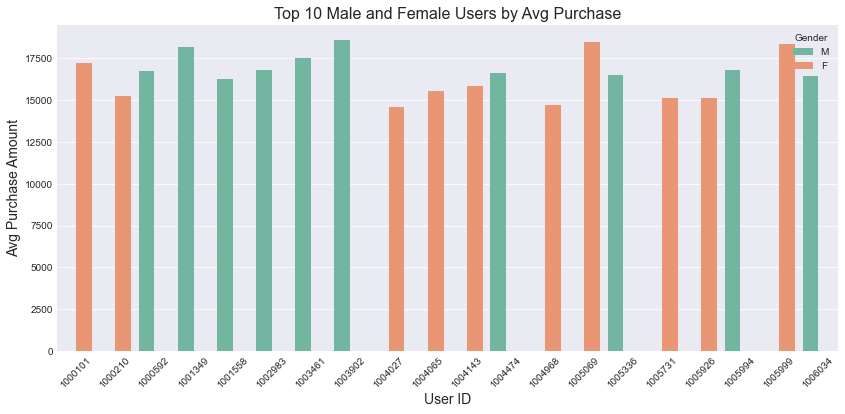

In [100]:

# Filter top 10 male and female users by total purchase
top_10_male_users_by_avg_purchase = user_purchase[user_purchase['Gender'] == 'M'].nlargest(10, 'avg_purchase')
top_10_female_users_by_avg_purchase = user_purchase[user_purchase['Gender'] == 'F'].nlargest(10, 'avg_purchase')

# Combine both top male and female users into one DataFrame
top_users = pd.concat([top_10_male_users_by_avg_purchase, top_10_female_users_by_avg_purchase])

# Plotting the bar plot for comparison
plt.figure(figsize=(14, 6))
sns.barplot(data=top_users, x='User_ID', y='avg_purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Top 10 Male and Female Users by Avg Purchase', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Avg Purchase Amount', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [101]:
category_gender = df.groupby(['Product_Category', 'Gender']).agg(
    total_purchase=('Purchase', 'sum'),
    avg_purchase=('Purchase', 'mean'),
    num_transactions=('Purchase', 'count')
).reset_index()


In [102]:
category_gender

,Product_Category,Gender,total_purchase,avg_purchase,num_transactions
0,1,F,337631145,13597.162619,24831
1,1,M,1572382609,13608.164721,115547
2,2,F,64543617,11407.496819,5658
3,2,M,203972569,11203.590520,18206
4,3,F,61637516,10262.656677,6006
5,3,M,142447197,10026.550081,14207
6,4,F,8933206,2454.851882,3639
7,4,M,18447282,2273.512694,8114
8,5,F,264658078,6307.239532,41961
9,5,M,677177151,6214.230729,108972


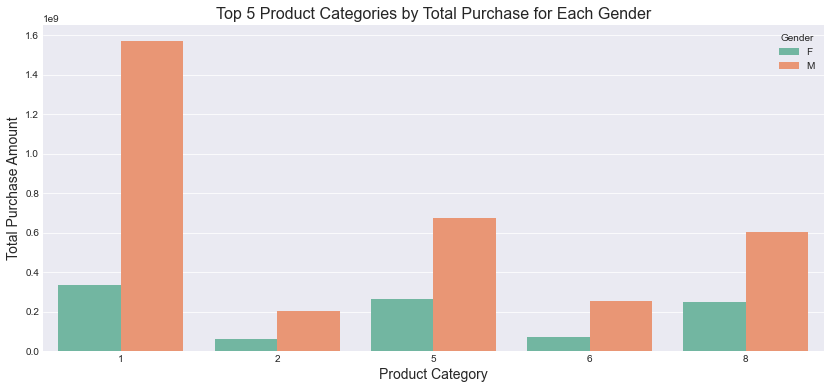

In [103]:
# Get the top 5 product categories by total purchase for each gender
top_5_female_categories = category_gender[category_gender['Gender'] == 'F'].nlargest(5, 'total_purchase')
top_5_male_categories = category_gender[category_gender['Gender'] == 'M'].nlargest(5, 'total_purchase')

# Combine both male and female top categories into one DataFrame
top_categories = pd.concat([top_5_female_categories, top_5_male_categories])

# Plotting the bar plot for comparison
plt.figure(figsize=(14, 6))
sns.barplot(data=top_categories, x='Product_Category', y='total_purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Top 5 Product Categories by Total Purchase for Each Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)

# Show the plot
plt.show()

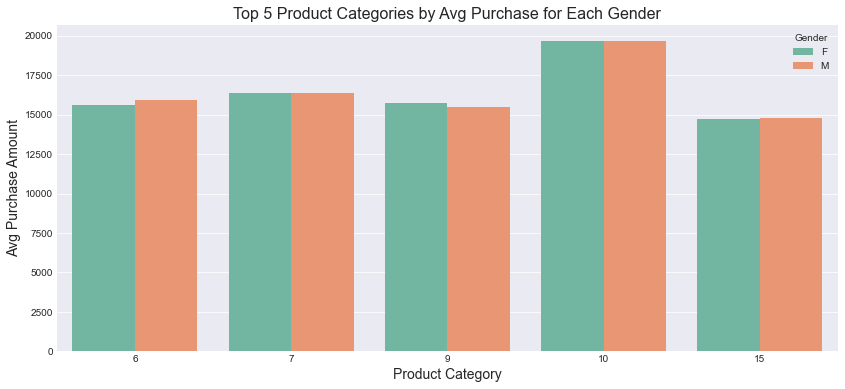

In [104]:
# Get the top 5 product categories by total purchase for each gender
top_5_female_categories = category_gender[category_gender['Gender'] == 'F'].nlargest(5, 'avg_purchase')
top_5_male_categories = category_gender[category_gender['Gender'] == 'M'].nlargest(5, 'avg_purchase')

# Combine both male and female top categories into one DataFrame
top_categories = pd.concat([top_5_female_categories, top_5_male_categories])

# Plotting the bar plot for comparison
plt.figure(figsize=(14, 6))
sns.barplot(data=top_categories, x='Product_Category', y='avg_purchase', hue='Gender', palette='Set2')

# Set plot title and labels
plt.title('Top 5 Product Categories by Avg Purchase for Each Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Avg Purchase Amount', fontsize=14)

# Show the plot
plt.show()